In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r'C:\Users\DELL\DS COURSE NARESH IT\python files\Visadataset - Visadataset.csv'
visa_df = pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Steps in Outlier analysis**
- Step-1: Find the Q1 , Q2 and Q3
    - np.percentile(column data,q)
- Step-2: Calculate the IQR
    - IQR=Q3-Q1
- Step-3: Calculate lower boundary and upper boundary
    - lb: Q1-1.5 x IQR
    - ub: Q3+1.5 x IQR
- Step-4: Find the Outliers df
    - c1: column data < lb
    - c2: column data > ub
    - c: apply the main condition
    - main data

$Step-1$

In [57]:
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q2=np.percentile(visa_df['prevailing_wage'],50)
Q3=np.percentile(visa_df['prevailing_wage'],75)

Q1,Q2,Q3

(34015.479999999996, 70308.20999999999, 107735.51250000001)

$Step-2$

In [58]:
IQR = Q3-Q1
IQR

73720.03250000002

$Step-3$

In [59]:
lb = Q1-1.5*IQR
ub = Q3+1.5*IQR

lb,ub

(-76564.56875000002, 218315.56125000003)

$Step-4$

In [60]:
c1 = visa_df['prevailing_wage']<lb
c2 = visa_df['prevailing_wage']>ub
c = c1 | c2
outliers_df=visa_df[c]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


$Step-5$

In [61]:
c1 = visa_df['prevailing_wage']>lb
c2 = visa_df['prevailing_wage']<ub
c = c1 & c2
non_outliers_df=visa_df[c]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Comparing original data with non outliers data**
- Will plot histogram and box plot of the both

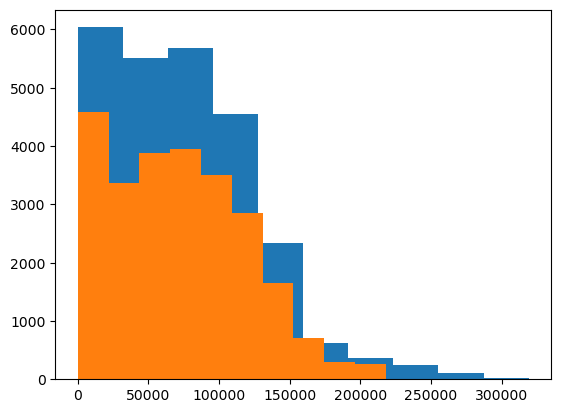

In [62]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()

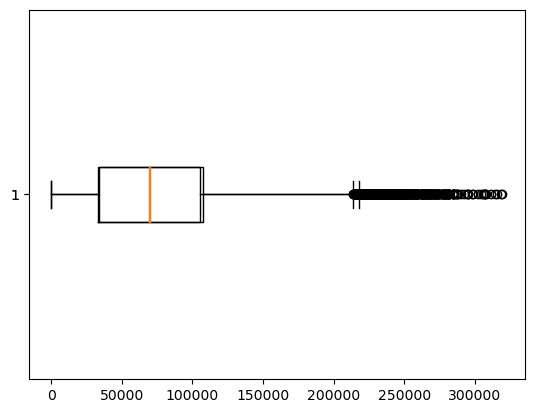

In [63]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False)
plt.show()

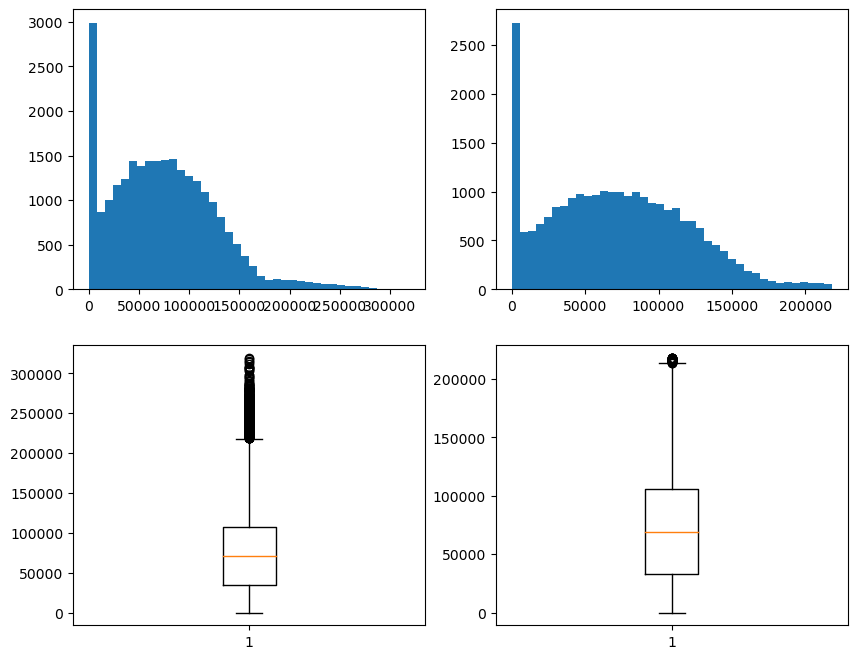

In [64]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,3)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

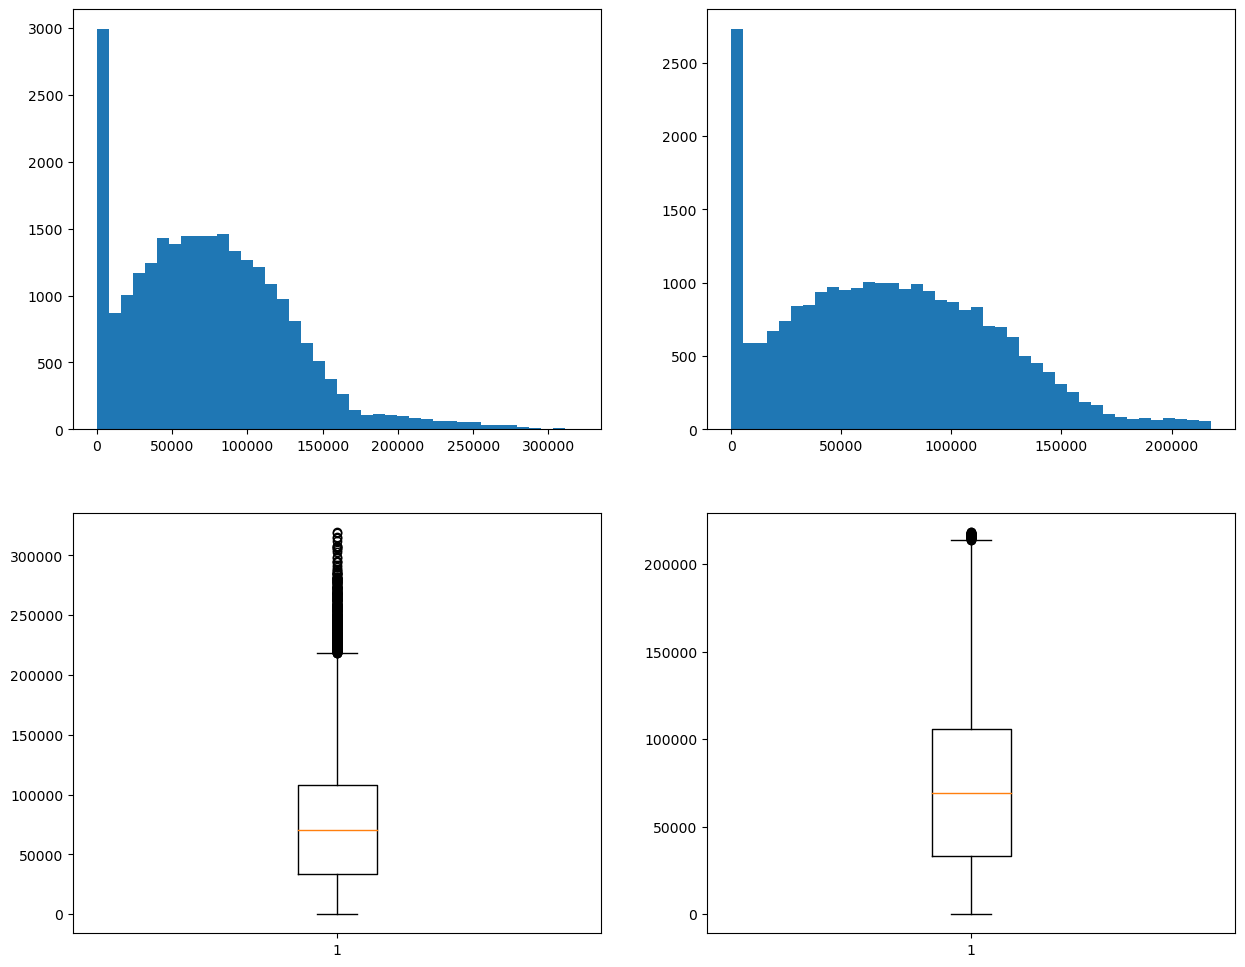

In [65]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,2).hist(non_outliers_df['prevailing_wage'],bins=40)
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.show()

## How to deal outliers:

**Drop the outliers**
   - We can drop the outliers of outlier percentage < 2%
   - But this is not recommended , we lost other columns data aslo

**Impute with Median values**
   - As we know that Median does not affect by outliers
   - So it is good practice we can impute outliers with Median value

**Cap with Q3 or Q1 value**
   - If outliers are present less than lower bound then fill with Q1
   - If outliers are more than upper bound then fill with Q3

## Task-3
- **Read the each observation from prevailing wage**
- **If that observation <lb or <ub: fill with median value**
- **esle: keep as it is**
    
    - $Steps$
        - take empty list=[]
        - median= visa_df['prevailing_wage'].median()
        - for i in visa_df['prevailing_wage']
        - if i < lb or i > ub
        - emptylist.append(median)
        - else
        - emptylist.append(i)

In [66]:
list1=[]
median = visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i < lb or i > ub:
        list1.append(median)
    else:
        list1.append(i)
list1

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [67]:
visa_df['prevailing_wage_new']=list1

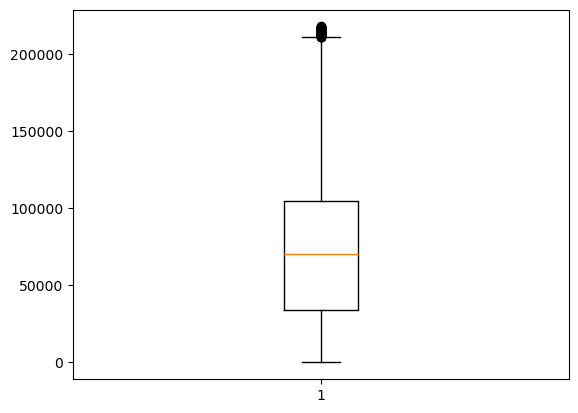

In [68]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

**np.where**
- Above replace one we use a traditional approach
- For loop, if and else
- the same we can get using np.where methos

In [69]:
dict1 = {'Name':['A','B','C','D'],'Age':[1,2,3,4]}
d=pd.DataFrame(dict1)
d

,Name,Age
0,A,1
1,B,2
2,C,3
3,D,4


In [70]:
# I want to replace num which has >2
# Other wise keep same number
#np.where(<Condition>,<True>,<False>)
np.where(d['Age']>2,100,d['Age'])

array([  1,   2, 100, 100], dtype=int64)

In [71]:
# To get it in a dataframe we need to store it in a variable
l = np.where(d['Age']>2,100,d['Age'])
d['Age']=l
d

,Name,Age
0,A,1
1,B,2
2,C,100
3,D,100


In [72]:
c1 = visa_df['prevailing_wage']<lb 
c2 = visa_df['prevailing_wage']>ub
con = c1 | c2
t = visa_df['prevailing_wage'].median
f = visa_df['prevailing_wage']
l2 = np.where(con,t,f)
l2

array([592.2029, 83425.65, 122996.86, ..., 146298.85, 86154.77, 70876.91],
      dtype=object)

TypeError: unsupported operand type(s) for +: 'float' and 'method'

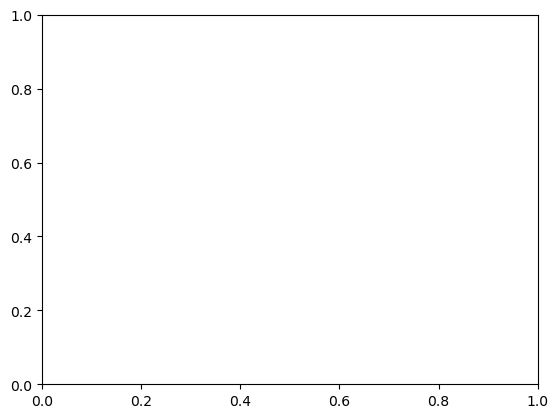

In [73]:
visa_df['prevailing_wage'] = l2
plt.boxplot(visa_df['prevailing_wage'])
plt.show()